In [814]:
import pandas as pd
import numpy as np

# Drawing the embeddings
import matplotlib.pyplot as plt
!pip install keras==2.2.4
!pip install tensorflow==1.13.
%tensorflow_version 1.x
# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

ERROR: Could not find a version that satisfies the requirement tensorflow==1.13. (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.7.0rc0, 2.7.0rc1, 2.7.0)
ERROR: No matching distribution found for tensorflow==1.13.


In [815]:
data = pd.read_csv('/content/Geom.csv')

In [816]:
print(data)

          .1  Unnamed: 2  ...  Unnamed: 119  Unnamed: 120  Unnamed: 121
0    82    0    81.55081  ...     -8.571701            82     -0.000381
1    82    0    81.55078  ...     -8.571686            82     -0.000366
2   129    0   128.29330  ...    -13.484740           129     -0.000595
3   108    0   107.40840  ...    -11.289550           108     -0.000504
4   145    0   144.20570  ...    -15.157260           145     -0.000671
5    89    0    88.51245  ...     -9.303406            89     -0.000427
6    83    0    82.54532  ...     -8.676208            83     -0.000366
7   133    0   132.27140  ...    -13.902860           133     -0.000610
8   116    0   115.36450  ...    -12.125820           116     -0.000534
9    79    0    78.56723  ...     -8.258099            79     -0.000366
10  131    0   130.28230  ...    -13.693790           131     -0.000610
11   89    0    88.51245  ...     -9.303436            89     -0.000397
12   85    0    84.53442  ...     -8.885300            85     -0

In [817]:
train=np.array(data)
train=(train-train.mean())/train.std()

In [818]:
data.shape

(22, 122)

In [819]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_size = 60 
# This is our input 
input= keras.Input(shape=(122,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_size, activation='linear')(input)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(122, activation='linear')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)

In [820]:
# This model maps an input to its encoded representation
encoder = keras.Model(input, encoded)

In [821]:
# This is our encoded  input
encoded_input = keras.Input(shape=(encoding_size,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [822]:
autoencoder.compile(optimizer='adam', loss='mse')

In [823]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, = train_test_split(data, test_size=0.22, random_state=42)

In [824]:
import numpy as np
import pandas as pd
array1 = np.array(x_train)
array2 = np.array(x_test)


x_train = array1.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = array2.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(17, 122)
(5, 122)


In [825]:
autoencoder.fit(train[:17],train[:17],
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Train on 17 samples, validate on 5 samples
Epoch 1/100
17/17 [==============================] - 1s 55ms/step - loss: 2.2151 - val_loss: 8254.5566
Epoch 2/100
17/17 [==============================] - 0s 369us/step - loss: 1.8751 - val_loss: 7036.5728
Epoch 3/100
17/17 [==============================] - 0s 336us/step - loss: 1.5951 - val_loss: 6034.6733
Epoch 4/100
17/17 [==============================] - 0s 402us/step - loss: 1.3650 - val_loss: 5210.4141
Epoch 5/100
17/17 [==============================] - 0s 445us/step - loss: 1.1759 - val_loss: 4533.9575
Epoch 6/100
17/17 [==============================] - 0s 344us/step - loss: 1.0209 - val_loss: 3980.3452
Epoch 7/100
17/17 [==============================] - 0s 443us/step - loss: 0.8943 - val_loss: 3526.2642
Epoch 8/100
17/17 [==============================] - 0s 397us/step - loss: 0.7906 - val_loss: 3150.1216
Epoch 9/100
17/17 [==============================] - 0s 413us/step - loss: 0.7049 - val_loss: 2833.2417
Epoch 10/100
17/17 [==

In [826]:
autoencoder.summary()


Model: "model_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 122)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 60)                7380      
_________________________________________________________________
dense_75 (Dense)             (None, 122)               7442      
Total params: 14,822
Trainable params: 14,822
Non-trainable params: 0
_________________________________________________________________


In [827]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_data = encoder.predict(train[17:])
decoded_data = decoder.predict(encoded_data)

In [828]:
xdata_r=np.zeros((22,61))
ydata_r=np.zeros((22,61))
j=0
for x in x_train:
    dataytemp,dataxtemp=[],[]

    for i in range(0,121,2):
        dataxtemp.append(x[i])
        dataytemp.append(x[i+1])
    xdata_r[j]=dataxtemp
    ydata_r[j]=dataytemp
    j += 1

In [829]:
Datax=np.zeros((5,61))
Datay=np.zeros((5,61))
j=0
for x in x_test:
    Dataytemp,Dataxtemp=[],[]

    for i in range(0,121,2):
        Dataxtemp.append(x[i])
        Dataytemp.append(x[i+1])
    Datax[j]=Dataxtemp
    Datay[j]=Dataytemp
    j += 1

In [830]:
np.array(Datay).shape

(5, 61)

In [831]:
np.array(Datax).shape

(5, 61)

In [832]:


decoded_data.shape

(5, 122)

In [833]:
Datax1=np.zeros((5,61))
Datay1=np.zeros((5,61))
j=0
for x in decoded_data:
    Datay1temp,Datax1temp=[],[]

    for i in range(0,121,2):
        Datax1temp.append(x[i])
        Datay1temp.append(x[i+1])
    Datax1[j]=Datax1temp
    Datay1[j]=Datay1temp
    j += 1

In [834]:
np.array(Datax1).shape

(5, 61)

In [835]:
np.array(Datay1).shape

(5, 61)

In [836]:
np.array(Datax1)

array([[ 6.59139276e-01,  6.59537911e-01,  6.55886769e-01,
         6.14116192e-01,  6.23056054e-01,  5.69256544e-01,
         5.26903868e-01,  4.88970608e-01,  4.47623223e-01,
         3.92677665e-01,  3.08195800e-01,  2.77076095e-01,
         1.95620939e-01,  1.26454040e-01,  6.31165951e-02,
         1.32580288e-03, -9.03947279e-02, -1.56796351e-01,
        -2.06118703e-01, -2.70403743e-01, -3.42509955e-01,
        -3.87164474e-01, -4.49005544e-01, -5.27133405e-01,
        -5.51619053e-01, -5.89464426e-01, -6.37639582e-01,
        -6.54730976e-01, -6.61828697e-01, -6.80833817e-01,
        -6.85460508e-01, -6.73871279e-01, -6.43967092e-01,
        -6.50272548e-01, -6.25935912e-01, -5.95591843e-01,
        -5.66231668e-01, -5.18727779e-01, -4.46559757e-01,
        -4.02253598e-01, -3.42161566e-01, -2.92699039e-01,
        -2.18768120e-01, -1.52875304e-01, -7.05970824e-02,
        -2.08769217e-02,  5.28063141e-02,  1.38461053e-01,
         2.06645250e-01,  2.65726209e-01,  3.50950867e-0

In [837]:
MSE = np.square(np.subtract(x_test,decoded_data)).mean()
print(MSE)

4235.266749608356


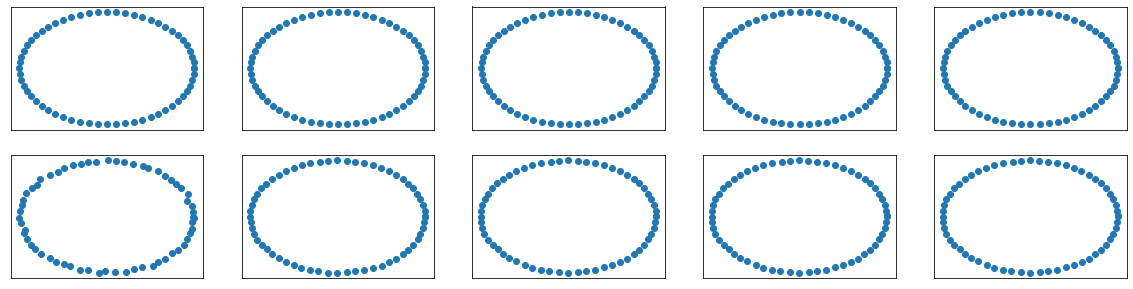

In [838]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 5 # How many digits we will display
plt.figure(figsize=(20, 5))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.scatter(Datax[i],Datay[i])
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
   # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.scatter(Datax1[i],Datay1[i])
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()